In [59]:
import pandas as pd
import geopandas as gpd

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [61]:
pd.options.display.float_format = '{:,.10f}'.format

In [70]:
sensors_df = pd.read_csv('SCOOT/data_470_hourly/locations.csv')
sensors_list = sensors_df.id.tolist()

### 1.Plot the statistical distribution of hourly traffic flow 

In [12]:
sensor_df_list = []
for sensor in sensors_list:
    sensor_df = pd.read_csv(f'SCOOT/data_470_hourly/{sensor}.csv')
    sensor_df = sensor_df[['time','flow']]
    sensor_df_list.append(sensor_df)
df_plot = pd.concat(sensor_df_list, ignore_index=True, sort=False)
df_plot

,time,flow
0,0,6
1,1,4
2,2,4
3,3,0
4,4,4
...,...,...
15812313,19,80
15812314,20,75
15812315,21,75
15812316,22,67


#### Plot via seaborn

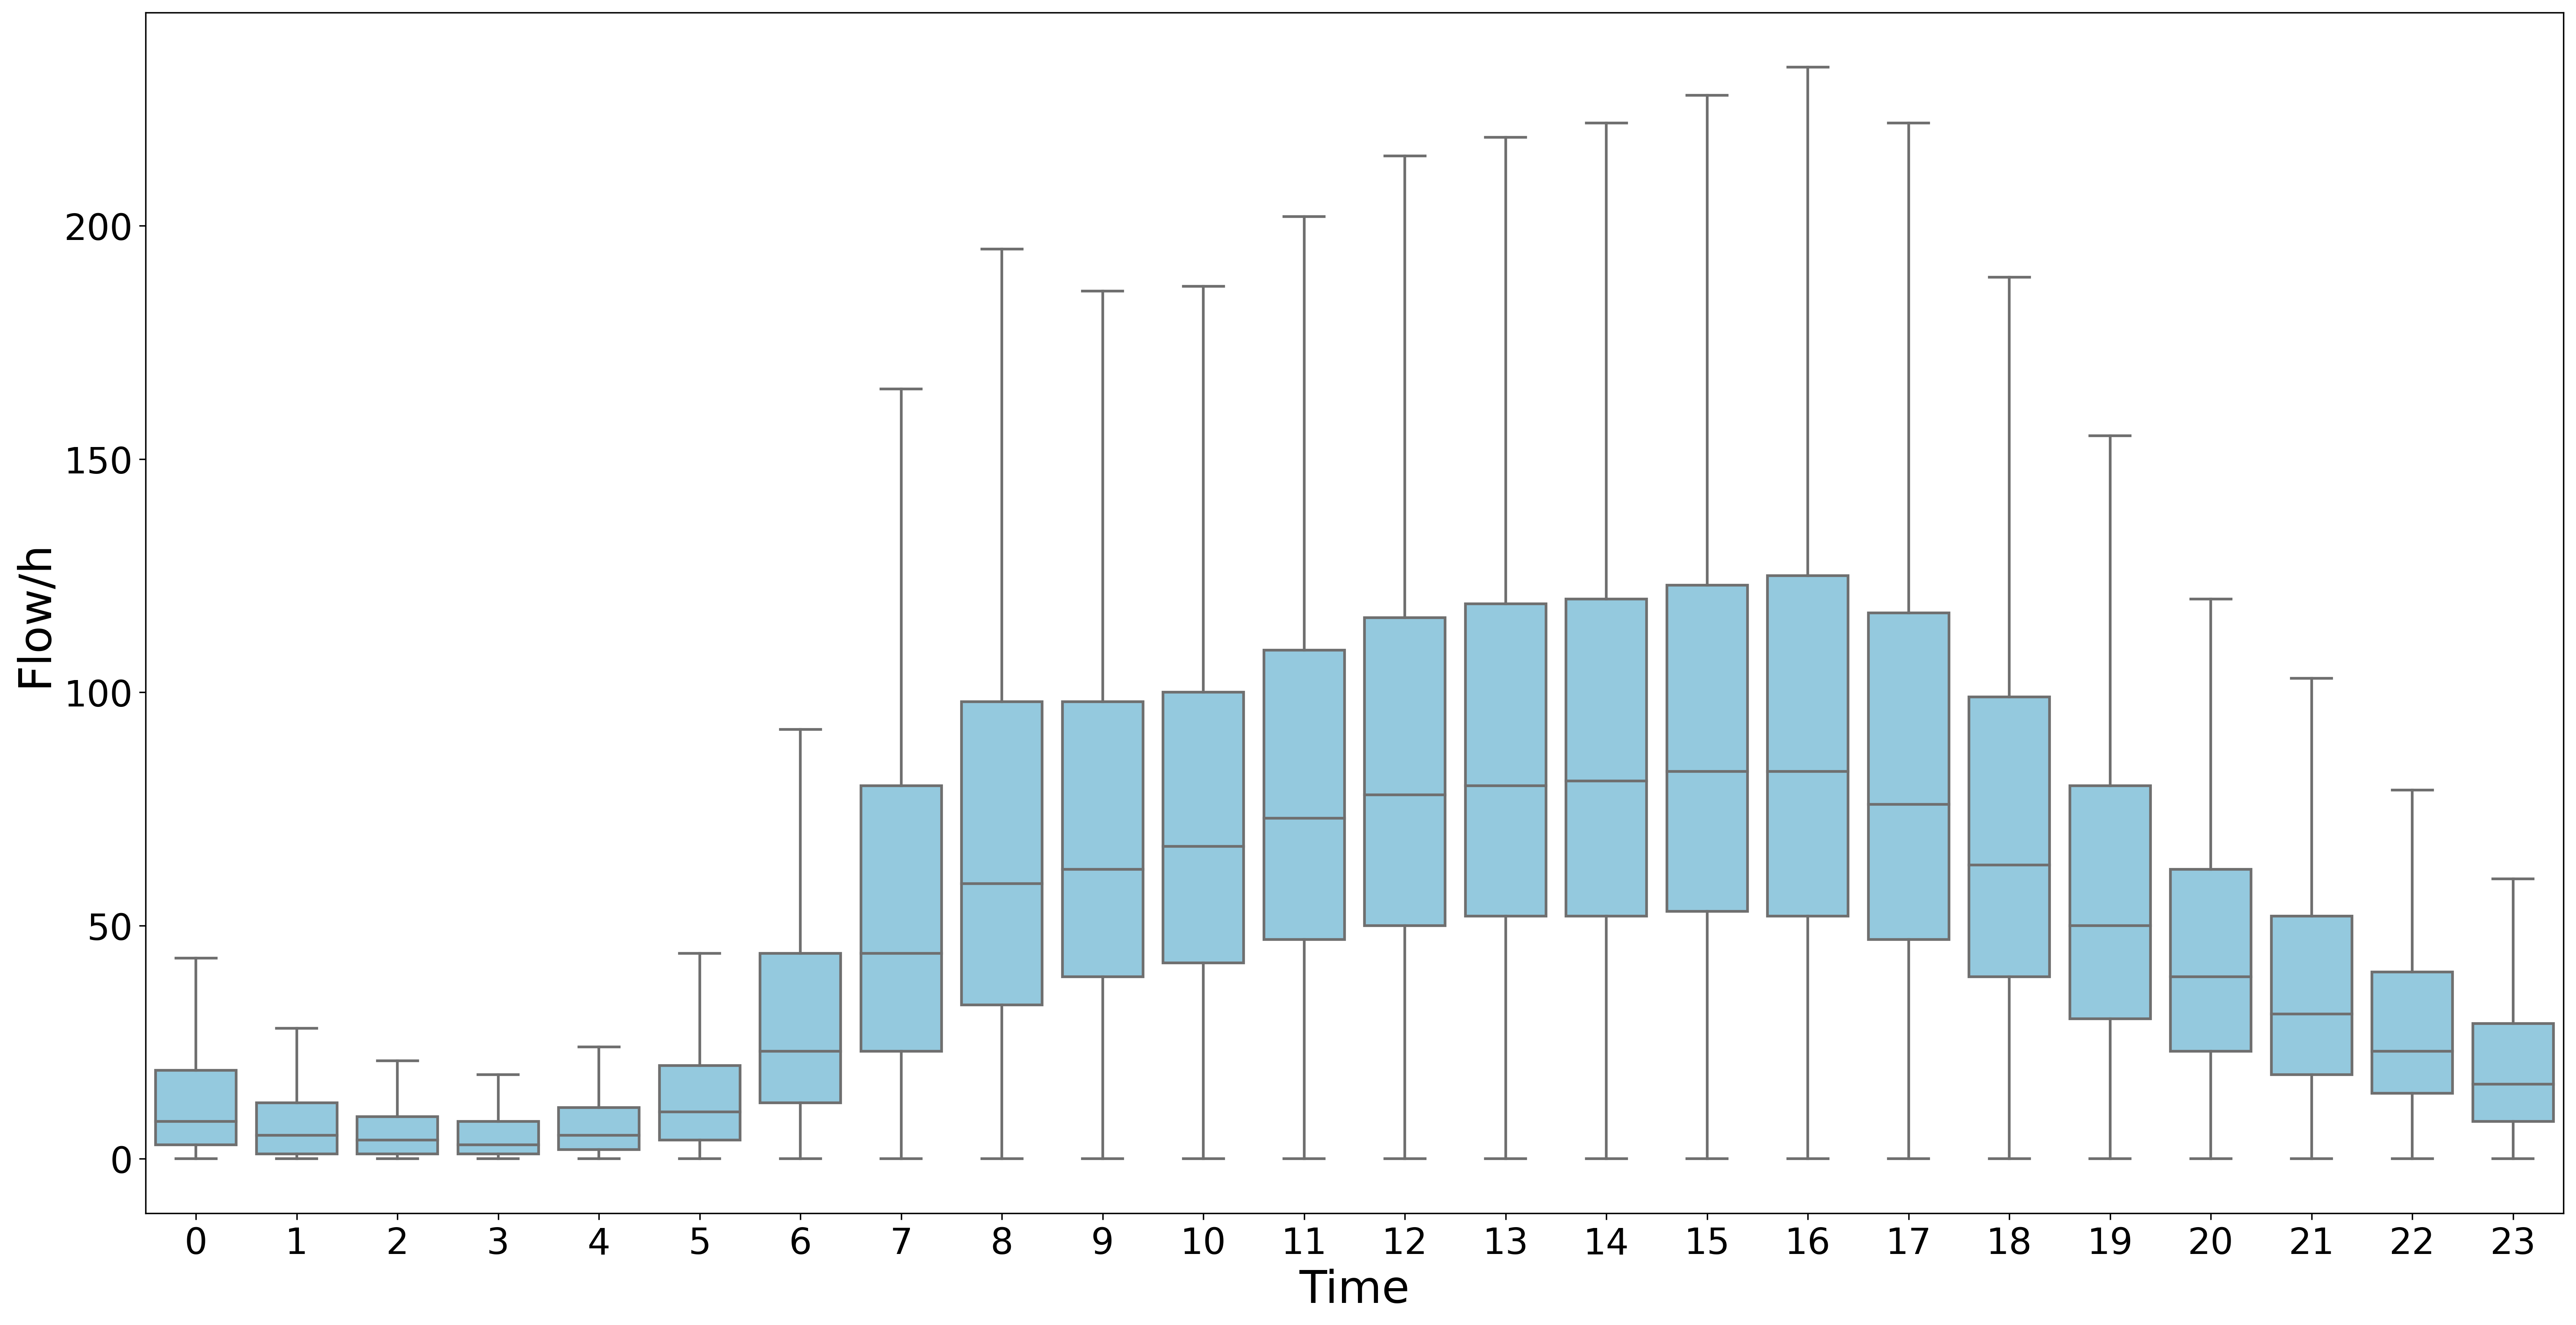

In [104]:
fig = plt.figure(figsize=(24, 12), dpi=300)
sns.boxplot(data=df_plot, x='time', y='flow', color='skyblue',showfliers=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Time',fontsize=25)
plt.ylabel('Flow/h',fontsize=25)
fig.savefig('../../../publication/from Yue/Data paper/figure/boxplot.png')

#### Plot via pandas

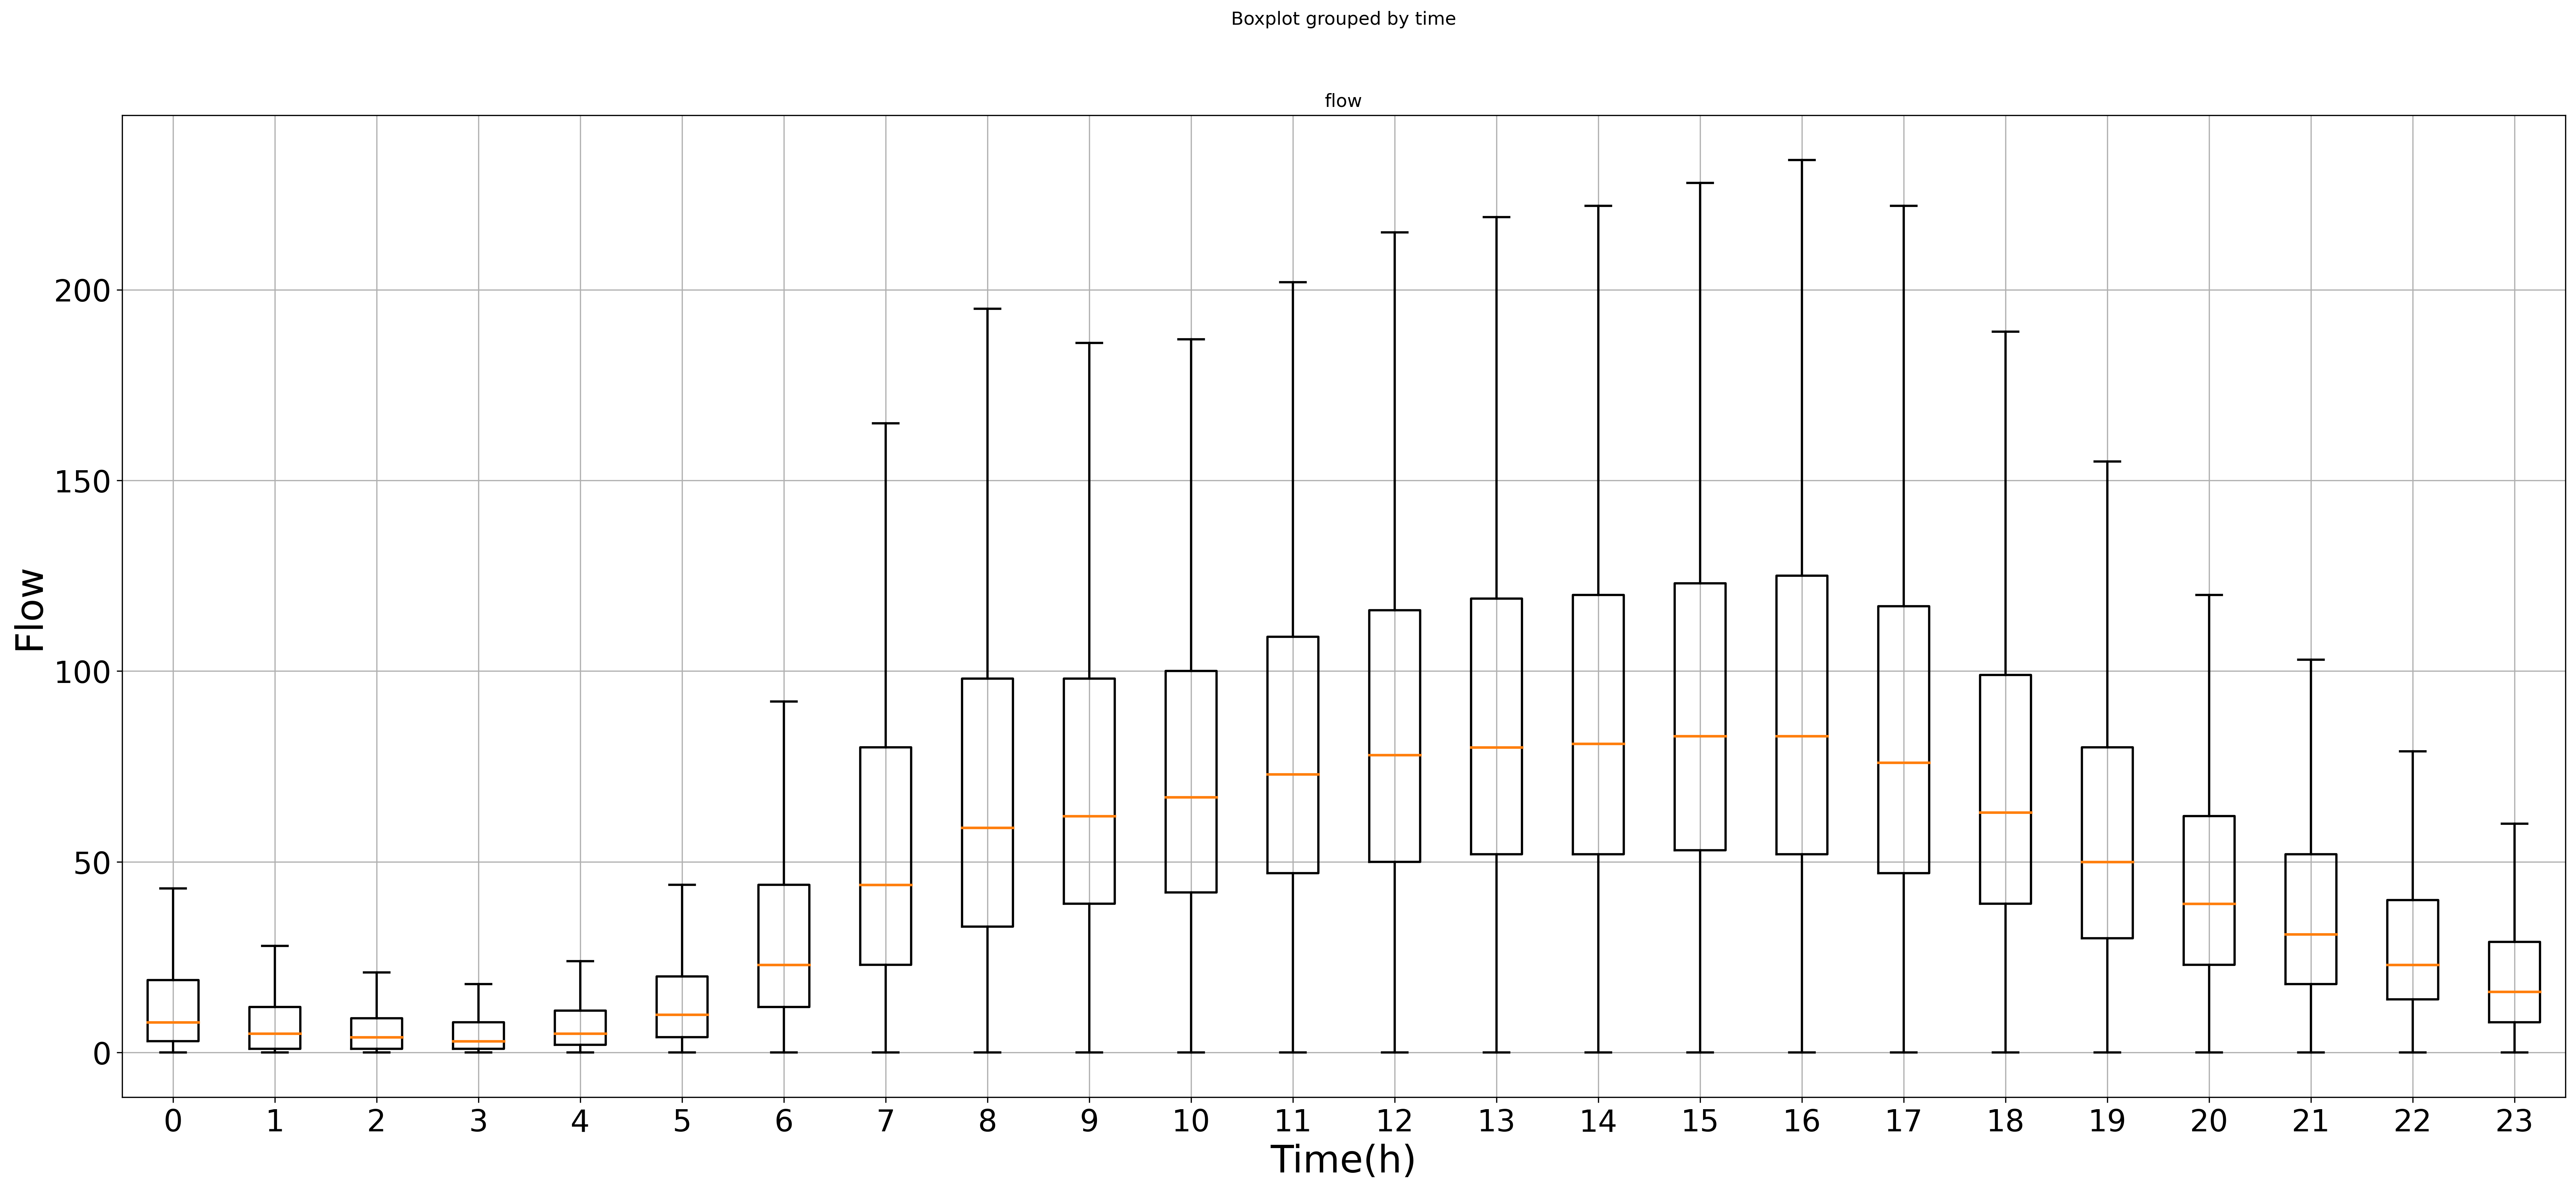

In [46]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [28, 12]

boxprops = dict(linewidth=1.5)
whiskerprops = dict(linewidth=1.5)
capprops = dict(linewidth=1.5)
medianprops=dict(linewidth=1.7)

df_plot.boxplot(by ='time', column =['flow'], showfliers=False, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)



plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Time(h)',fontsize=25)
plt.ylabel('Flow',fontsize=25)
#plt.savefig('../../../publication/from Yue/Data paper/figure/boxplot_2.png')

### 2.Plot the hourly zero frequency

#### Get the zero frequency of each sensor

In [20]:
def get_zero_frequency(sensor): 
    
    data = pd.read_csv(f'SCOOT/data_470_hourly/{sensor}.csv')
    zero_time = data.loc[data.flow == 0, 'time'].tolist()
    zero_time_frequency = dict(sorted((dict(Counter(zero_time))).items()))
    df_zero = pd.DataFrame([zero_time_frequency])
    df_zero.insert(loc=0, column='siteId', value=sensor)
    
    return df_zero

In [42]:
sensor_df_ls = []
for sensor in sensors_list:
    sensor_df = get_zero_frequency(sensor)
    sensor_df_ls.append(sensor_df)
zero_df = pd.concat(sensor_df_ls)#.reset_index(drop=True)
zero_df = zero_df.fillna(0)
#convert float to int
#pd.options.display.float_format = '{:,.0f}'.format
zero_df

,siteId,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,GA0151_A,48,94,139,183,153,68,26,2,1,...,5,5,5,5,4,4,3,3,7,11
0,GA0151_C,4,18,46,50,29,6,0,1,1,...,5,5,5,5,4,4,3,3,3,1
0,GA0151_D,8,18,32,51,55,18,0,1,1,...,5,5,5,5,4,4,3,3,3,1
0,GA0401_R,262,338,420,454,304,151,47,4,1,...,3,4,7,4,4,5,6,3,6,101
0,GA0401_S,21,37,58,76,37,6,2,1,1,...,2,2,2,2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,GL3551_R,2,16,42,28,8,2,1,1,0,...,0,1,2,2,2,2,1,1,1,1
0,GL3551_S,44,74,109,110,74,4,2,1,0,...,0,1,2,2,2,2,1,1,1,8
0,GL3551_T,27,63,98,78,23,2,1,1,0,...,0,1,2,2,2,2,1,1,1,1
0,GL4151_B,782,898,986,985,776,315,39,10,6,...,5,7,8,8,7,40,78,144,228,562


#### Transpose and reconstruct the dataframe for plot

In [43]:
zero_T = zero_df.T
zero_T_nosite = zero_T.iloc[1:]
sites = zero_T.iloc[0:1]
sites = pd.concat([sites]*24)
#Reconstruct the column of sensors and zero frequency 
new_zero = pd.concat([zero_T_nosite.iloc[:,i:i+1] for i in range(0,zero_T_nosite.shape[1],1)]).reset_index()
new_sites = pd.concat([sites.iloc[:,i:i+1] for i in range(0,sites.shape[1],1)]).reset_index(drop=True)
zero_plot = pd.concat([new_sites, new_zero],axis=1, ignore_index=True)
zero_plot.rename(columns={0: 'siteId', 1: 'time', 2: 'zero_frequency'}, inplace=True)
zero_plot['zero_frequency'] = zero_plot['zero_frequency'].astype(str).astype(float)
zero_plot

,siteId,time,zero_frequency
0,GA0151_A,0,48
1,GA0151_A,1,94
2,GA0151_A,2,139
3,GA0151_A,3,183
4,GA0151_A,4,153
...,...,...,...
11275,GL4151_C,19,10
11276,GL4151_C,20,37
11277,GL4151_C,21,112
11278,GL4151_C,22,128


#### Box plot via pandas

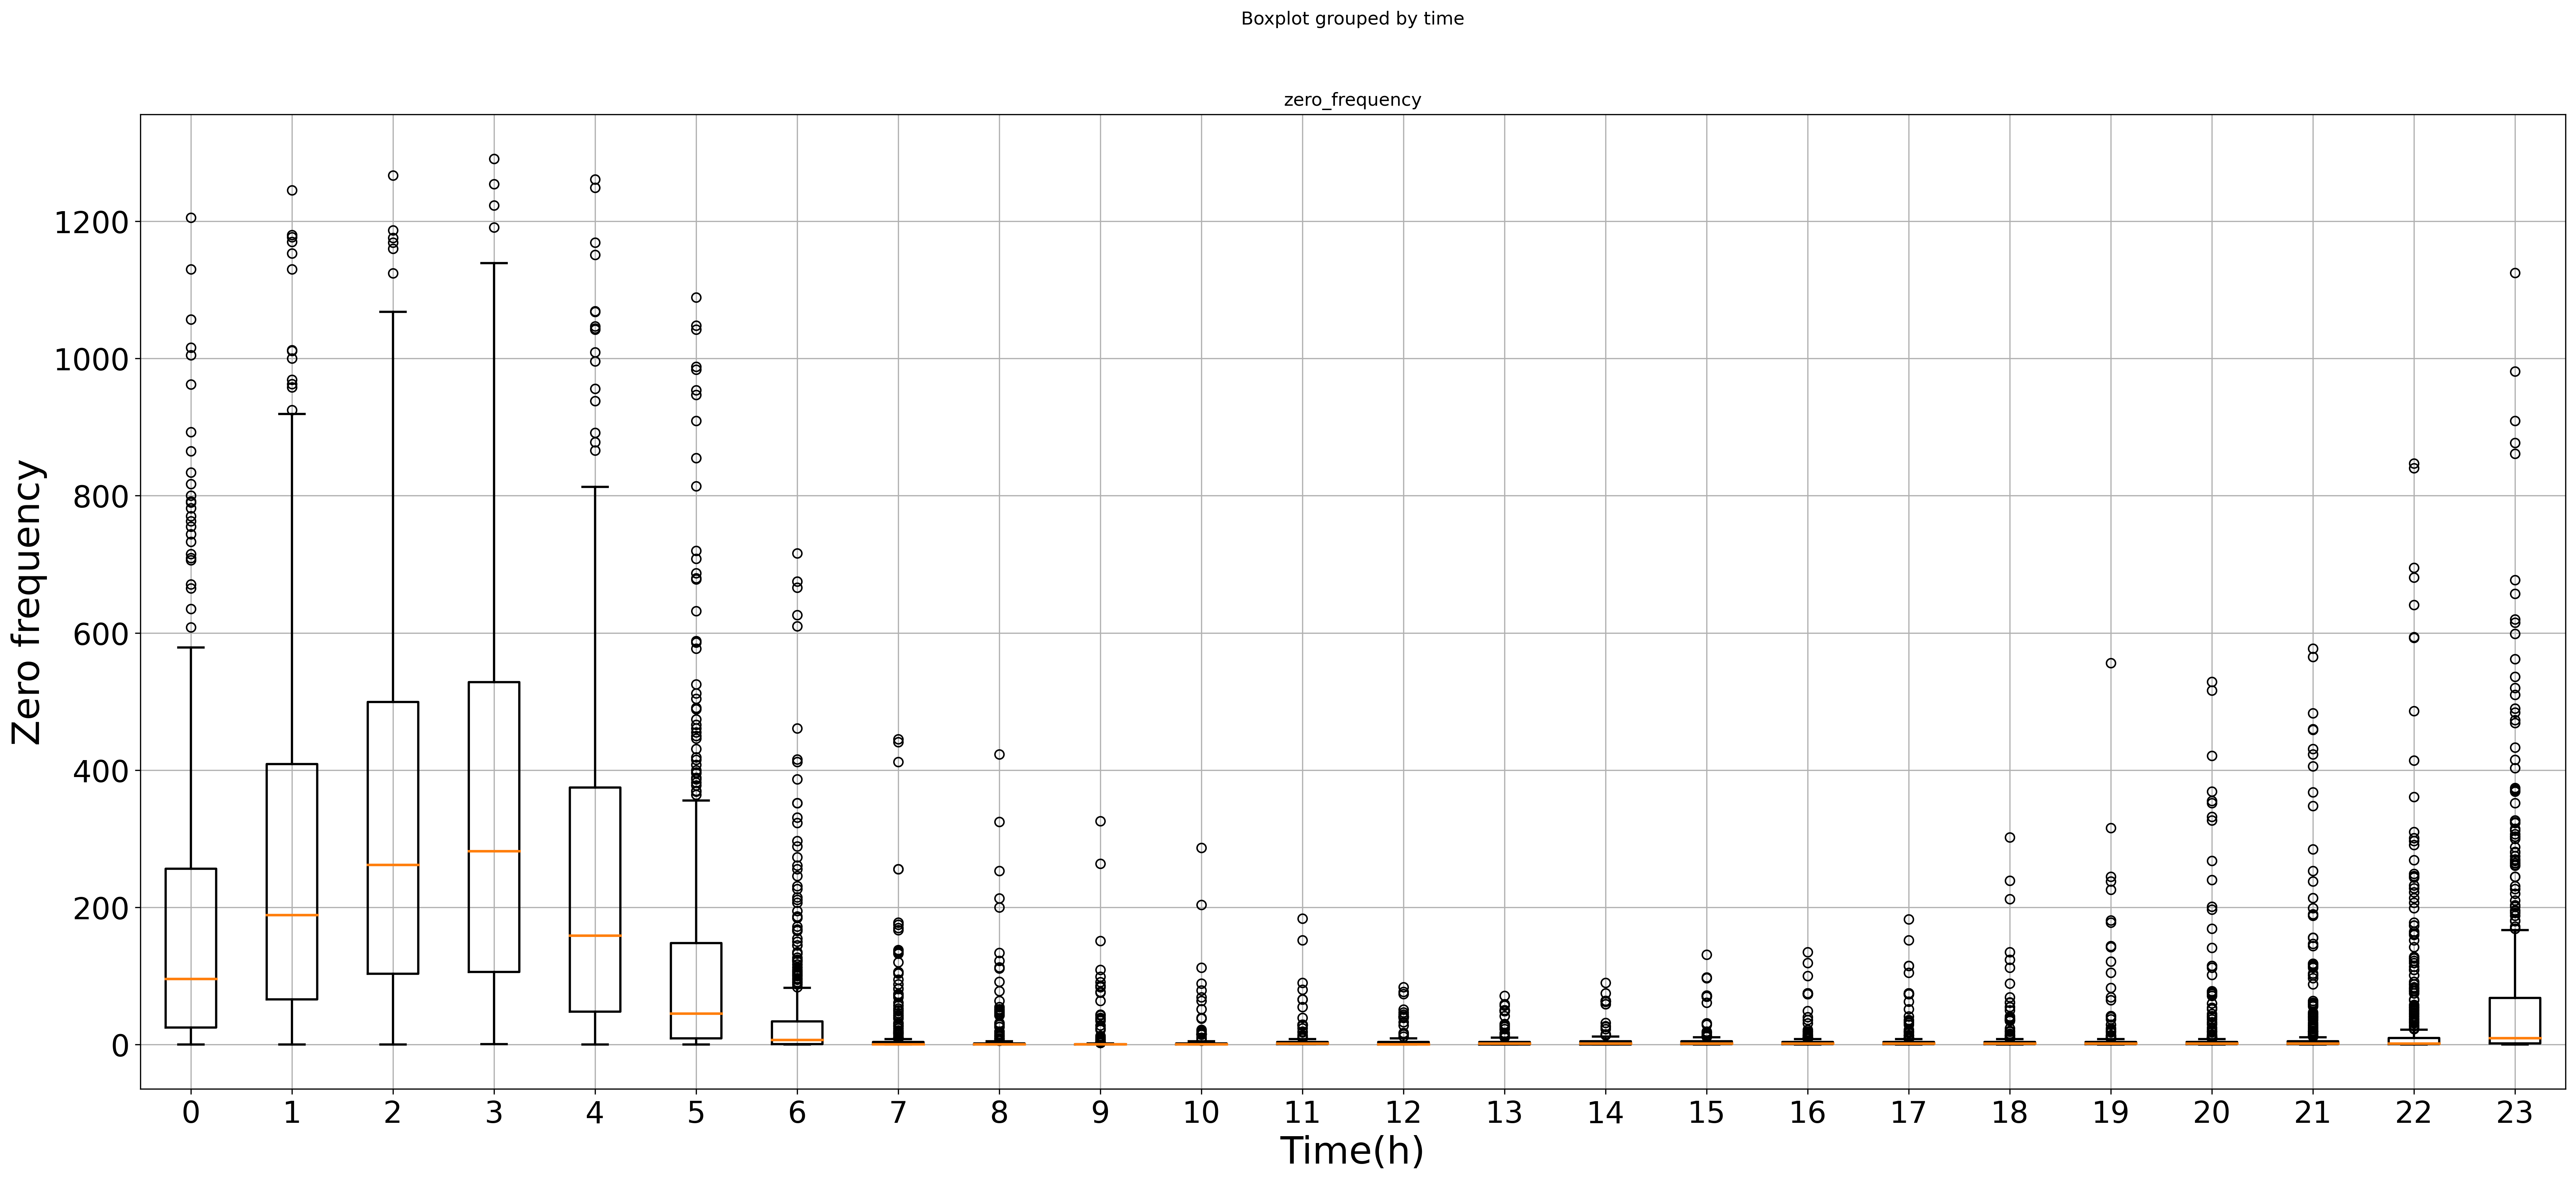

In [50]:
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [28, 12]

boxprops = dict(linewidth=1.5)
whiskerprops = dict(linewidth=1.5)
capprops = dict(linewidth=1.5)
medianprops=dict(linewidth=1.7)

zero_plot.boxplot(by ='time', column =['zero_frequency'], boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)



plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Time(h)',fontsize=25)
plt.ylabel('Zero frequency',fontsize=25)
plt.savefig('../../../publication/from Yue/Data paper/figure/box_zero_freq.png')

#### Heatmap for 4 years

### Plot spatial distribution of hourly traffic flow (not useful for visualisation)

#### Find the closest road of each sensor

In [67]:
road_link = gpd.read_file('../Glasgow_road_link-shp/road_link_shp/20211110_glasgow_road_link.shp')
road_link = road_link[['TOID','roadClassi','routeHiera','formOfWay','SHAPE_Leng', 'geometry']]

sensors_df["geometry"] = gpd.points_from_xy(sensors_df["longitude"], sensors_df["latitude"])
# set coordinates to WGS84
sensors_df = gpd.GeoDataFrame(sensors_df, crs="epsg:4326")

sensors_df = sensors_df.to_crs("32630")
road_df = road_link.to_crs("32630")

In [81]:
sensor_road = gpd.sjoin_nearest(sensors_df, road_df, how='left', distance_col="distances")
sensor_road = sensor_road[['id','TOID','distances']]
sensor_road

,id,TOID,distances
0,GA0151_A,osgb4000000005153397,8.0032996039
1,GA0151_C,osgb4000000005153071,1.1686666079
2,GA0151_D,osgb4000000005153015,1.3933230235
3,GA0401_R,osgb4000000005153454,1.5244695079
4,GA0401_S,osgb4000000005376915,3.1385895572
...,...,...,...
465,GL3551_R,osgb4000000005140020,0.3024529652
466,GL3551_S,osgb4000000005140299,0.0552496619
467,GL3551_T,osgb4000000005139998,1.7510949982
468,GL4151_B,osgb5000005159032219,1.7615128488


#### Get the hourly flow(2023-09-30,12) of each sensor 

In [103]:
for sensor in sensors_list:
    sensor_df = pd.read_csv(f'SCOOT/data_470_hourly/{sensor}.csv')
    flow = sensor_df.loc[sensor_df.date == '2023-09-30'].loc[sensor_df.time == 12,'flow'].item()
    sensor_road.loc[sensor_road.id == sensor, 'flow'] = flow
    
sensor_road

,id,TOID,distances,flow
0,GA0151_A,osgb4000000005153397,8.0032996039,44.0000000000
1,GA0151_C,osgb4000000005153071,1.1686666079,204.0000000000
2,GA0151_D,osgb4000000005153015,1.3933230235,148.0000000000
3,GA0401_R,osgb4000000005153454,1.5244695079,30.0000000000
4,GA0401_S,osgb4000000005376915,3.1385895572,122.0000000000
...,...,...,...,...
465,GL3551_R,osgb4000000005140020,0.3024529652,268.0000000000
466,GL3551_S,osgb4000000005140299,0.0552496619,127.0000000000
467,GL3551_T,osgb4000000005139998,1.7510949982,155.0000000000
468,GL4151_B,osgb5000005159032219,1.7615128488,21.0000000000


In [104]:
road_sensor_df = pd.merge(road_df, sensor_road, how="left", on="TOID")
road_sensor_df = road_sensor_df.fillna(0)

In [111]:
road_sensor_flow = road_sensor_df.to_crs("27700")
#road_sensor_flow.to_file('../../../publication/from Yue/Data paper/map/Myproject4 (1)/road_sensor_flow_hourly.shp', driver='ESRI Shapefile')